In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("D:/Coursera/Projects/Medical Appointment No-Shows/Medical Appointment No-Shows.csv")

In [2]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589980e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262960e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679510e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841190e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [4]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.920000e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172615e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173180e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439170e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999820e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [5]:
df.columns = df.columns.str.lower().str.replace('-', '_')

In [6]:
df['scheduledday'] = pd.to_datetime(df['scheduledday']).dt.date
df['appointmentday'] = pd.to_datetime(df['appointmentday']).dt.date

In [7]:
df = df[df['age'] >= 0]

In [8]:
df['no_show'] = df['no_show'].apply(lambda x: 1 if x == 'Yes' else 0)

In [9]:
df.head()

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show
0,2.987250e+13,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,0
1,5.589980e+14,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,0
2,4.262960e+12,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,0
3,8.679510e+11,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0
4,8.841190e+12,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,0


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 110526 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   patientid       110526 non-null  float64
 1   appointmentid   110526 non-null  int64  
 2   gender          110526 non-null  object 
 3   scheduledday    110526 non-null  object 
 4   appointmentday  110526 non-null  object 
 5   age             110526 non-null  int64  
 6   neighbourhood   110526 non-null  object 
 7   scholarship     110526 non-null  int64  
 8   hipertension    110526 non-null  int64  
 9   diabetes        110526 non-null  int64  
 10  alcoholism      110526 non-null  int64  
 11  handcap         110526 non-null  int64  
 12  sms_received    110526 non-null  int64  
 13  no_show         110526 non-null  int64  
dtypes: float64(1), int64(9), object(4)
memory usage: 12.6+ MB


In [11]:
no_show_rate = df['no_show'].mean() * 100
print(f"Overall No-show Rate: {no_show_rate:.2f}%")

Overall No-show Rate: 20.19%


In [12]:
# No-show rate by Gender
gender_noshow_rate = df.groupby('gender')['no_show'].mean() * 100
print("\nNo-show Rate by Gender:")
print(gender_noshow_rate)

# No-show rate for specific diseases (e.g., Hipertension)
hipertension_noshow_rate = df.groupby('hipertension')['no_show'].mean() * 100
print("\nNo-show Rate by Hipertension:")
print(hipertension_noshow_rate)


No-show Rate by Gender:
gender
F    20.314871
M    19.967948
Name: no_show, dtype: float64

No-show Rate by Hipertension:
hipertension
0    20.903917
1    17.301959
Name: no_show, dtype: float64


In [13]:
no_show_counts = df['no_show'].value_counts(normalize=True) * 100

print("Overall No-show Rate:")
print(no_show_counts)

Overall No-show Rate:
no_show
0    79.806561
1    20.193439
Name: proportion, dtype: float64


In [14]:
sms_noshow_rate = df.groupby('sms_received')['no_show'].mean() * 100
print("\nNo-show Rate by SMS_received:")
print(sms_noshow_rate)


No-show Rate by SMS_received:
sms_received
0    16.703534
1    27.574545
Name: no_show, dtype: float64


In [15]:
gender_noshow_rate = df.groupby('gender')['no_show'].mean() * 100
print("\nNo-show Rate by Gender:")
print(gender_noshow_rate)


No-show Rate by Gender:
gender
F    20.314871
M    19.967948
Name: no_show, dtype: float64


In [16]:
bins = [0, 18, 30, 45, 60, 100]
labels = ['0-18', '19-30', '31-45', '46-60', '60+']
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)

age_noshow_rate = df.groupby('age_group')['no_show'].mean() * 100
print("\nNo-show Rate by Age Group:")
print(age_noshow_rate)


No-show Rate by Age Group:
age_group
0-18     21.903649
19-30    24.648855
31-45    21.823631
46-60    17.871754
60+      15.305737
Name: no_show, dtype: float64


C:\Users\Anees\AppData\Local\Temp\ipykernel_14136\83075847.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_noshow_rate = df.groupby('age_group')['no_show'].mean() * 100


In [17]:
top_10_noshow_areas = df.groupby('neighbourhood')['no_show'].mean().nlargest(10) * 100
print("\nTop 10 Neighbourhoods with Highest No-show Rate:")
print(top_10_noshow_areas)


Top 10 Neighbourhoods with Highest No-show Rate:
neighbourhood
ILHAS OCEÂNICAS DE TRINDADE    100.000000
SANTOS DUMONT                   28.918495
SANTA CECÍLIA                   27.455357
SANTA CLARA                     26.482213
ITARARÉ                         26.266363
JESUS DE NAZARETH               24.395373
HORTO                           24.000000
ILHA DO PRÍNCIPE                23.477493
CARATOÍRA                       23.040936
ANDORINHAS                      23.032714
Name: no_show, dtype: float64


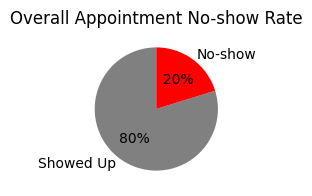

In [18]:
no_show_counts = df['no_show'].value_counts(normalize=True) * 100
labels = ['Showed Up', 'No-show']
colors = ['gray', 'red']

plt.figure(figsize=(2, 2))
plt.pie(no_show_counts, labels=labels, autopct='%1.0f%%', colors=colors, startangle=90)
plt.title('Overall Appointment No-show Rate')
plt.show()

In [19]:
bins = [0, 18, 30, 45, 60, 100]
labels = ['0-18', '19-30', '31-45', '46-60', '60+']
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)
age_noshow_rate = df.groupby('age_group', observed=False)['no_show'].mean() * 100

C:\Users\Anees\AppData\Local\Temp\ipykernel_14136\3942516433.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=age_noshow_rate.index, y=age_noshow_rate.values, palette="Set1")


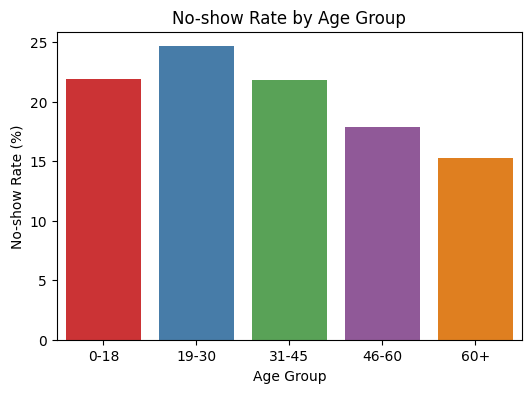

In [20]:
plt.figure(figsize=(6, 4))
sns.barplot(x=age_noshow_rate.index, y=age_noshow_rate.values, palette="Set1")
plt.title('No-show Rate by Age Group')
plt.xlabel('Age Group')
plt.ylabel('No-show Rate (%)')
plt.show()


C:\Users\Anees\AppData\Local\Temp\ipykernel_14136\2172199558.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=gender_noshow_rate.index, y=gender_noshow_rate.values, palette="viridis")


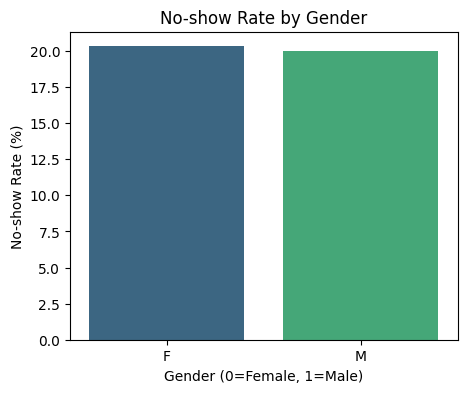

In [21]:
gender_noshow_rate = df.groupby('gender')['no_show'].mean() * 100
plt.figure(figsize=(5, 4))
sns.barplot(x=gender_noshow_rate.index, y=gender_noshow_rate.values, palette="viridis")
plt.title('No-show Rate by Gender')
plt.xlabel('Gender (0=Female, 1=Male)')
plt.ylabel('No-show Rate (%)')
plt.show()

In [42]:
sms_noshow_rate = df.groupby('sms_received')['no_show'].mean() * 100
plt.figure(figsize=(5, 4))
sns.barplot(x=sms_noshow_rate.index, y=sms_noshow_rate.values, palette="rocket")
plt.title('No-show Rate by SMS Received')
plt.xlabel('SMS Received (0=No, 1=Yes)')
plt.ylabel('No-show Rate (%)')
plt.show()

KeyError: 'sms_received'

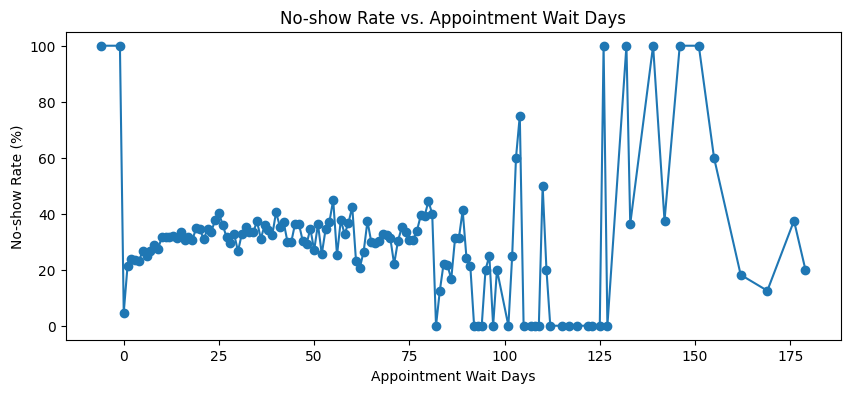

In [23]:

df['scheduledday'] = pd.to_datetime(df['scheduledday'])
df['appointmentday'] = pd.to_datetime(df['appointmentday'])


df['appointment_wait_days'] = (df['appointmentday'] - df['scheduledday']).dt.days


wait_noshow_rate = df.groupby('appointment_wait_days')['no_show'].mean() * 100

plt.figure(figsize=(10, 4))
plt.plot(wait_noshow_rate.index, wait_noshow_rate.values, marker='o')
plt.title('No-show Rate vs. Appointment Wait Days')
plt.xlabel('Appointment Wait Days')
plt.ylabel('No-show Rate (%)')
plt.show()

C:\Users\Anees\AppData\Local\Temp\ipykernel_14136\4014096629.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=gender_noshow_rate.index, y=gender_noshow_rate.values, palette="viridis", ax=axes[0, 1])
C:\Users\Anees\AppData\Local\Temp\ipykernel_14136\4014096629.py:24: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_noshow_rate = df.groupby('age_group')['no_show'].mean() * 100
C:\Users\Anees\AppData\Local\Temp\ipykernel_14136\4014096629.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=age_n

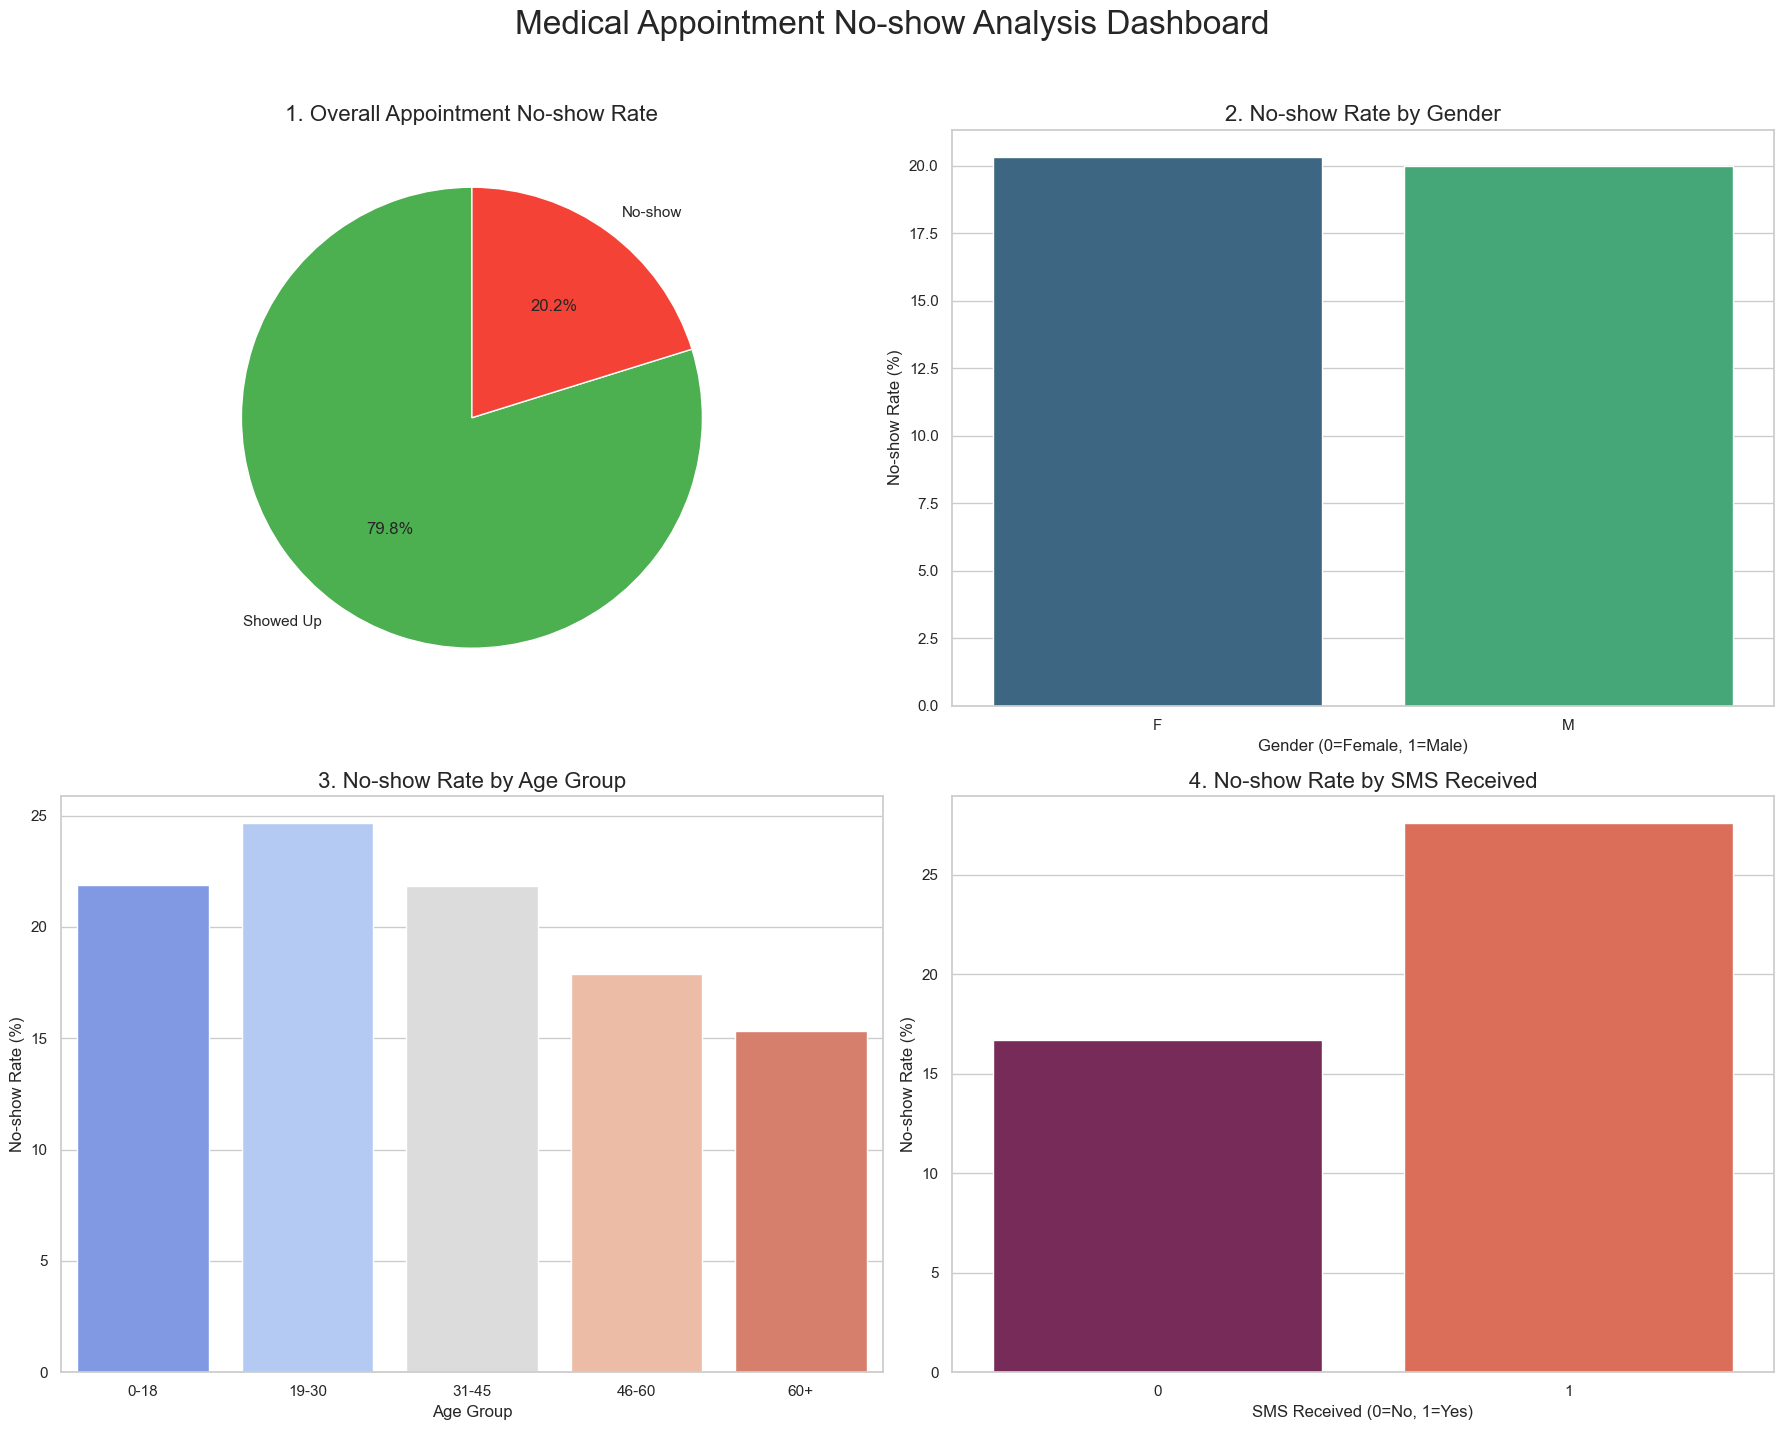

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")


fig, axes = plt.subplots(2, 2, figsize=(18, 14))
fig.suptitle('Medical Appointment No-show Analysis Dashboard', fontsize=24, y=1.02)

# --- Plot 1: Overall No-show Rate (Pie Chart) ---
no_show_counts = df['no_show'].value_counts(normalize=True) * 100
labels = ['Showed Up', 'No-show']
colors = ['#4CAF50', '#F44336']
axes[0, 0].pie(no_show_counts, labels=labels, autopct='%1.1f%%', colors=colors, startangle=90)
axes[0, 0].set_title('1. Overall Appointment No-show Rate', fontsize=16)

# --- Plot 2: No-show Rate by Gender (Bar Chart) ---
gender_noshow_rate = df.groupby('gender')['no_show'].mean() * 100
sns.barplot(x=gender_noshow_rate.index, y=gender_noshow_rate.values, palette="viridis", ax=axes[0, 1])
axes[0, 1].set_title('2. No-show Rate by Gender', fontsize=16)
axes[0, 1].set_xlabel('Gender (0=Female, 1=Male)')
axes[0, 1].set_ylabel('No-show Rate (%)')

# --- Plot 3: No-show Rate by Age Group (Bar Chart) ---
age_noshow_rate = df.groupby('age_group')['no_show'].mean() * 100
sns.barplot(x=age_noshow_rate.index, y=age_noshow_rate.values, palette="coolwarm", ax=axes[1, 0])
axes[1, 0].set_title('3. No-show Rate by Age Group', fontsize=16)
axes[1, 0].set_xlabel('Age Group')
axes[1, 0].set_ylabel('No-show Rate (%)')

# --- Plot 4: No-show Rate by SMS Received (Bar Chart) ---
sms_noshow_rate = df.groupby('sms_received')['no_show'].mean() * 100
sns.barplot(x=sms_noshow_rate.index, y=sms_noshow_rate.values, palette="rocket", ax=axes[1, 1])
axes[1, 1].set_title('4. No-show Rate by SMS Received', fontsize=16)
axes[1, 1].set_xlabel('SMS Received (0=No, 1=Yes)')
axes[1, 1].set_ylabel('No-show Rate (%)')


plt.tight_layout()
plt.show()

In [25]:
df['gender'] = df['gender'].replace({'F': 0, 'M': 1})

C:\Users\Anees\AppData\Local\Temp\ipykernel_14136\3294156851.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['gender'] = df['gender'].replace({'F': 0, 'M': 1})


In [26]:
# The corrected list of categorical features
categorical_features = ['neighbourhood', 'scholarship', 'hipertension', 'diabetes', 'alcoholism', 'handcap', 'sms_received']

df = pd.get_dummies(df, columns=categorical_features, drop_first=True)

In [29]:
!pip install scikit-learn


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [30]:
from sklearn.model_selection import train_test_split

# Features (X) aur target (y) 
X = df.drop(['patientid', 'appointmentid', 'scheduledday', 'appointmentday', 'no_show', 'age_group'], axis=1)
y = df['no_show']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [32]:
from sklearn.linear_model import LogisticRegression

# Model initialize 
model = LogisticRegression(max_iter=1000)

# Model ko training at data
model.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [33]:
from sklearn.metrics import accuracy_score, classification_report

# Test data at prediction 
y_pred = model.predict(X_test)

# check modle accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")

# Classification report 
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Model Accuracy: 0.80

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.99      0.89     17715
           1       0.37      0.02      0.04      4391

    accuracy                           0.80     22106
   macro avg       0.59      0.51      0.46     22106
weighted avg       0.72      0.80      0.72     22106



In [34]:
!pip install imbalanced-learn

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [35]:
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd
import numpy as np

# Load data again to be safe
# df = pd.read_csv('Medical Appointment No-Shows.csv')
# Preprocessing steps (clean, transform) as done previously
# X and y from previous steps
# X_train, X_test, y_train, y_test from previous steps

# SMOTE to initialize 
smote = SMOTE(random_state=42)

# aply smote on tranning data
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# new data
print("Original Training data shape:", X_train.shape)
print("Resampled Training data shape:", X_train_resampled.shape)

Original Training data shape: (88420, 92)
Resampled Training data shape: (140984, 92)


In [36]:
# traun modle on new data(resampled) 
model_resampled = LogisticRegression(max_iter=1000)
model_resampled.fit(X_train_resampled, y_train_resampled)

# Test perdiction on data
y_pred_resampled = model_resampled.predict(X_test)

# check the model performance again
print("Model Accuracy (Resampled):", accuracy_score(y_test, y_pred_resampled))
print("\nClassification Report (Resampled):")
print(classification_report(y_test, y_pred_resampled))

Model Accuracy (Resampled): 0.7792002171356193

Classification Report (Resampled):
              precision    recall  f1-score   support

           0       0.81      0.94      0.87     17715
           1       0.33      0.11      0.17      4391

    accuracy                           0.78     22106
   macro avg       0.57      0.53      0.52     22106
weighted avg       0.72      0.78      0.73     22106



C:\Users\Anees\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
